<left><img src="https://i.ibb.co/zWjkHsWJ/marca-final-rgb-campanha-2025-versao02.png" width="35%" height="35%"></left>

# Tópicos em Matemática Aplicada: Deep Learning (Aula 03)

Data: 09/set/25

---
## Introdução (Exemplo 1)

**Objetivo**: construir uma rede neural para classificar dígitos manuscritos da base de dados MNIST.

* Os dígitos são imagens em escala de cinza com dimensão $28\times 28$ e distribuídas em 10 classes ($0,1,2,\ldots,9$).

* Imagens em escala de cinza são matrizes e cada entrada dela equivale a um nível de intensidade luminosa. Neste conjunto de dados, as imagens variam a intensidade luminosa de $0$ (preto) a $255$ (branco) apenas com entradas inteiras.

* Será então construída uma rede neural cuja entrada são as $784=28\times 28$ entradas das figuras e a saída é a classe em que esta imagem deve estar contida. Neste tipo de situação as matrizes que representam as imagens serão reescritas como um vetor, de tal forma que as entradas do vetor correspondem as colunas da matriz da imagem.

* Esta rede terá duas camadas, além da entrada, com 10 neurônios, na primeira utilizaremos a função de ativação `ReLU` e na segunda camada a função `softmax`.

* A classe numérica em que cada imagem está contida deverá ser convertida para o que se chama de `formato categórico`, isto é, a cada classe será associado um vetor em $\mathbb{R}^{10}.$ Por exemplo, a classe $0$ será associada ao vetor $(1,0,0,\ldots,0),$ a classe $1$ ao vetor $(0,1,0,\ldots,0)$ e assim por diante. Isto é necessário para podermos comparar adequadamente a saída da rede com a classe, pois estamos calculando distância entre vetores.

* Aqui utilizaremos como função de perda a entropia cruzada (*cross-entropy)* $$\mathcal{L}(y,\hat{y}_\theta)=-\sum_{j=1}^{10} y_j\ln\hat{y}_{\theta,j},$$ sendo $y_j$ a classe original do dígito, $\hat{y}_{\theta,j}$ a classe estimada pela rede e $j$ é o índice das imagens utilizadas no treinamento.

* A saída que será produzida pela rede neural é um vetor de probabilidades, uma vez que a função de ativação escolhida para a saída é a `softmax`. Isto é, dada uma imagem $\mathbf{x}$ de entrada, que deverá ser classificada, a rede produzirá como resposta, por exemplo, um vetor na forma $\hat{y}_{\theta,j}(\mathbf{x})=(0.05 \, ,\,0.07 \, ,\, 0.01\, ,\, 0.12\, ,\, 0.57\, ,\, 0.02\, ,\, 0.015\, ,\, 0.015\, ,\, 0.05\, ,\, 0.08).$ Nesta situação, a imagem $\mathbf{x}$ será classificada como um $4$.

---
## Parte 1: manipulação e visualização dos dados

---
**Iniciamos importando as bibliotecas necessárias!**

`numpy` para cálculo numérico

`panda` para manipulação de dados

`pyplot` para imprimir as figuras

In [ ]:
# bibliotecas básicas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

---
Aqui estamos lendo o arquivo que contém a informação das imagens.

*obs: caso esteja utilizando o `google colab` espere carregar todo o arquivo `2.aula_03_(09_09_25)_data_tema_2_25.csv`, caso contrário a rede dará algum erro e não convergirá adequadamente.*

In [ ]:
# acessa o google drive
from google.colab import drive
drive.mount('/content/drive')

# le o arquivo das imagens
data = pd.read_csv('/content/drive/MyDrive/TEMA - 2.25/códigos/2.aula_03_(09_09_25)_data_tema_2_25.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
Estamos lidando com 42000 amostras de imagens de manuscritos de tamanho $28\times 28=784$ já escritos no formato de vetor.

Perceba que o vetor tem uma entrada a mais. Ela representa a etiqueta daquele número manuscrito.

In [ ]:
data = np.array(data)
m, n = data.shape # método que devolve a dimensão dos dados
print(data.shape)

(42000, 785)


---
Das 42000 imagens, separamos 4200 (10%) delas pra teste e as demais para o treino!

In [ ]:
#separar o que é teste e o que é treino

np.random.shuffle(data) # começamos embaralhando os dados com o método shuffle

#teste
data_dev = data[0:4200].T
Y_dev = data_dev[0] # classe
X_dev = data_dev[1:n] # a informação das imagens

#treino
data_train = data[4200:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
_,m_train = X_train.shape

---
Vamos analisar como são as imagens. Perceba que nas matrizes os valores são inteiros e variam entre $0$ e $255$.

In [ ]:
#mostra as imagens
Z = X_train.reshape((28,28,m_train)) # o método reshape serve para transformar o vetor empilhado de volta numa matriz

print(Z[:,:,0]) # começamos mostrando como são os dados das imagens

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  30   0   0   0   0   0   0   0  28 143 253 255
  146   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 144   4   0   0   0   0   0  80 225 21

---
Agora vemos como os dígitos manuscritos são visualmente.

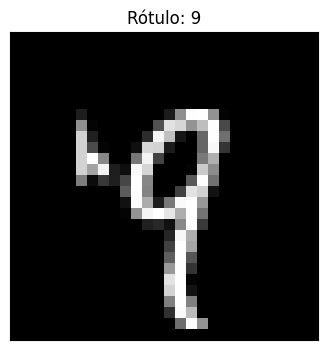

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

ax.imshow(Z[:,:,0],cmap='gray') # plota a imagem
ax.set_title(f"Rótulo: {Y_train[0]}") # inclui o rótulo em que essa imagem está classificada
ax.get_xaxis().set_visible(False) # tiram os eixos x e y da visualização
ax.get_yaxis().set_visible(False)

---
Aqui iremos dividir as entradas dos vetores de teste e treino por $255$, isto é, estamos fazendo o que é conhecido de normalização. Na prática isto não é uma normalização dos vetores das imagens, porém agora a escala de como a cor é vista irá variar entre $0$ e $1$, e não mais entre $0$ e $255$. Este tipo de cuidado é importante para ajudar a rede a convergir evitando que o gradiente tenha a possibilidade de crescer demais.

In [ ]:
X_dev = X_dev / 255. #teste
X_train = X_train / 255. #treino

---
## Parte 2: construção da rede neural

---
Aqui definimos as funções de ativação que serão utilizadas: `ReLU` e `softmax`.

Lembrando que:
1. $\mathrm{ReLU}(x)=\max(0,x)$;
2. $\frac{d}{dx} \mathrm{ReLU}(x)=1$, se $x>0$, e $\frac{d}{dx} \mathrm{ReLU}(x)=0$, se $x<0$;
3. `softmax` produz um vetor em que cada entrada é dada por $\sigma(\mathbf{z})_j=\frac{\exp(z_j)}{\sum_k \exp(z_k)}.$

In [ ]:
# definicao das funções de ativação
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0 # retorna 1 se Z > 0  e retorna 0 se Z < 0

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

---
Construímos aqui as operações nas camadas.

1. Temos que $X$ é a matriz que contém as informações de cada imagem. Cada coluna desta matriz corresponde a uma imagem de um dígito. Essa matriz tem dimensão $784\times m$, $m$ para nós é a quantidade de imagens de treino. Neste caso, estamos usando $m=38800$.

2. Daí, fazemos a transformação afim das entradas
$Z^{[1]}=W^{[1]}X+b^{[1]},$
sendo que a matriz $W^{[1]}$ contém as informações dos pesos que ligam as entradas aos  $10$ neurônios da primeira camada e $b^{[1]}$ corresponde aos viéses de cada neurônio da primeira cadama. O resultado dessa operação fornece um vetor $10\times m.$

3. Em seguida, temos que aplicar a função de ativação para os neurônios da primeira camada fazendo $A^{[1]}=\mathrm{ReLU}(Z^{[1]}).$ Note que essa operação é feita entrada à entrada da matriz $Z^{[1]}$ e, portanto, a dimensão de $A^{[1]}$ é a mesma de $Z^{[1]}$.

4. Para a segunda camada, onde será produzida a saída, repetimos o procedimento descrito no item 2. Fazemos novamente uma transformação afim das entradas. No entanto, aqui as entradas correspondem às saídas dos neurônios anteriores. Portanto, a matriz de pesos aqui precisa ter dimensão menor, no caso $10\times 10$. Assim, a transformação afim é $Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}.$ Novamente, aqui $Z^{[2]}$ produzirá uma matriz $10\times m.$

5. Finalmente, precisamos aplicar a função de ativação na transformação afim que ocorreu na segunda camada. Neste caso a transformação será uma `softmax` que corresponderá as probabilidades citadas iniciais. Assim, $A^{[2]}=\mathrm{softmax}(Z^{[2]}).$

In [ ]:
# vamos operar as imagens nas camadas
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

---
Definindo os parâmetros iniciais: pesos e viéses

O método `rand(a,b)` produz uma matriz de dimensões $a\times b$ com valores aleatórios que são amostrados da distribuição uniforme no intervalo $[0,1]$. Fazendo, por exemplo, `np.random.rand(10, 784) - 0.5` iremos gerar uma matriz $10\times 784$ com entradas no intervalo $[-0.5\, , \, 0.5].$

Na prática a escolha inicial de pesos e viéses é feita usando método especializados. Tanto o Keras/TensorFlow como o Keras/Pytorch trazem as opções usuais de inicializadores para os pesos e viéses que variam desde as distribuições uniforme e normal até os inicializadores de Xavier Glorot. Este último, em particular, tem como objetivo inicializar os pesos de modo que a variância das ativações seja a mesma em todas as camadas. Essa variância constante ajuda a evitar que o gradiente exploda ou desapareça.

*Referência: X. Glorot, Y. Bengio. Understanding the difficulty of training deep feedforward neural networks. Proceedings of the Thirteenth International Conference on Artificial Intelligence and Statistics, 2010. URL: https://proceedings.mlr.press/v9/glorot10a.html*

In [ ]:
# definição dos parâmetros iniciais
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

---
Essa parte do código faz a codificação das classes das imagens para o formato categórico. Isto é importante para a comparação do resultado numérico gerado pela rede neural com os vetores de rótulos

In [ ]:
# faz o one-hot encoding do vetor de rótulos
def one_hot(Y): # one-hot encoding
    Y = Y.astype(int)
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

---
### Parte 2.1: cálculo das derivadas e o *backpropagation*

---

Agora entramos na parte mais complicada que é o cálculo do gradiente para a atualização dos parâmetros.

O que pretendemos calcular é a derivada da função de perda com relação a cada parâmetro de peso e viés. Para um classificador `softmax`, usaremos uma função de perda de entropia cruzada:
$$\mathcal{L}(y,\hat{y}_\theta) = -\sum_{i=1}^{10} y_i \ln(\hat{y}_{\theta,i}).$$
*Obs: é praxe dividir a função de perda pela quantidade de amostras que estão sendo utilizadas, no caso aqui $m$.*

Aqui, $\hat{y}_\theta$ é o vetor dos rótulos previstos e ele pode ter uma forma como:
$$\begin{bmatrix} 0.01 \ 0.02 \ 0.05 \ 0.02 \ 0.80 \ 0.01 \ 0.01 \ 0.00 \ 0.01 \ 0.07\end{bmatrix}.$$

O vetor $y$ é a codificação `one-hot` do rótulo do dado de treinamento. Se o rótulo para um exemplo de treinamento for 4, por exemplo, a sua codificação `one-hot` ficaria na forma:
$$\begin{bmatrix} 0 \ 0 \ 0 \ 0 \ 1 \ 0 \ 0 \ 0 \ 0 \ 0 \ \end{bmatrix}.$$

Observe que na soma $$\sum_{i=1}^{10} y_i \ln(\hat{y}_{\theta,i}),$$ o valor de $y_i = 0,$ para todos os $i$ exceto o rótulo correto. A função de perda para uma dada amostra,  é apenas o logaritmo da probabilidade dada para a previsão estimada. Em nosso exemplo acima, $$\mathcal{L}(y,\hat{y}_\theta) = -\ln(\hat{y}_5) = -\ln(0.80) \approx 0.2231.$$ Observe que, quanto mais próxima a probabilidade de predição estiver de 1, mais próxima a perda estará de 0. Conforme a probabilidade se aproxima de 0, a perda se aproxima de $+\infty$.

A minimização da função de perda melhora a precisão do nosso modelo. Como foi possível ver no exemplo, quanto mais perto a rede aproxima dos rótulos originais, mais perto de zero ficará a função de perda. O processo de otimização é feito através da descida do gradiente, em que subtraímos dos parâmetros que queremos otimizar ($W^{[1]}, W^{[2]}, b^{[1]}$ e $b^{[2]}$) uma quantidade proporcional ao gradiente da função de perda naquela variável, isto é:
$$W^{[1]} := W^{[1]} - \alpha \frac{\partial \mathcal{L}}{\partial W^{[1]}}$$
$$ b^{[1]} := b^{[1]} - \alpha \frac{\partial \mathcal{L}}{\partial b^{[1]}}$$
$$ W^{[2]} := W^{[2]} - \alpha \frac{\partial \mathcal{L}}{\partial W^{[2]}}$$
$$ b^{[2]} := b^{[2]} - \alpha \frac{\partial \mathcal{L}}{\partial b^{[2]}}, $$
o parâmetro $\alpha$ é o que chamamos de taxa de aprendizagem (*learning rate*).

Nosso objetivo no *backpropagation* é calcular as derivadas $\frac{\partial \mathcal{L}}{\partial W^{[1]}},\frac{\partial \mathcal{L}}{\partial b^{[1]}},\frac{\partial \mathcal{L}}{\partial W^{[2]}}$ e $\frac{\partial \mathcal{L}}{\partial b^{[2]}}.$ Apenas para simplificar, escreveremos essas quantidades como $dW^{[1]}, db^{[1]}, dW^{[2]},$ e $db^{[2]}$. Esses valores são calculados usando a regra da cadeia retrocedendo em nossa rede, começando pelo cálculo de $\frac{\partial \mathcal{L}}{\partial Z^{[2]}}$, ou $dZ^{[2]}$. Não é imediato, como veremos a seguir, mas essa derivada é dada por:
$$dZ^{[2]} = \left(A^{[2]}-y\right).$$

A partir desta derivada $dZ^{[2]}$, podemos utilizar a regra da cadeia, para $dW^{[2]}$ e $db^{[2]}$. Temos que:
$dW^{[2]} = dZ^{[2]} A^{[1]T}$ e $db^{[2]} =  \Sigma {dZ^{[2]}}.$

Então, para calcular $dW^{[1]}$ e $db^{[1]}$, primeiro encontraremos $dZ^{[1]}$, que é dado por:
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (Z^{[1]}).$$
Em seguida, obtemos:
$dW^{[1]} = dZ^{[1]} X^{T}$ e $db^{[1]} = \Sigma {dZ^{[1]}}.$

---
Aqui vamos mostrar que a derivada $\frac{\partial \mathcal{L}}{\partial Z^{[2]}}=\left(A^{[2]}-y\right).$

Começamos, então, tirando o $\ln$ do `softmax` para obter:
\begin{align*}\ln\hat{y}_{\theta,i} & =\ln\left(\frac{e^{z_{i}}}{\sum_{j=1}^{10}e^{z_{j}}}\right)\\
& =\ln\left(e^{z_{i}}\right)-\ln\left(\sum_{j=1}^{10}e^{z_{j}}\right)\\
& =z_{i}-\ln\left(\sum_{j=1}^{10}e^{z_{j}}\right)
\end{align*}

Em seguida derivamos a equação anterior em relação a variável $z_{k}$ para obtermos:
\begin{align*}\frac{\partial\ln\hat{y}_{\theta,i}}{\partial z_{k}} & =\frac{\partial z_{i}}{\partial z_{k}}-\frac{\partial\ln\left(\sum_{j=1}^{10}e^{z_{j}}\right)}{\partial z_{k}}\end{align*}

Note que o primeiro elemento de lado direito ficará na forma $$\frac{\partial z_{i}}{\partial z_{k}}=\begin{cases}
1 & z_{i}=z_{k}\\
0 & \text{caso contrário}
\end{cases}=\mathbb{1}(z_{i}=z_{k})=\delta_{ik},$$ em que $\mathbb{1}(z_{i}=z_{k})$ é a função indicadora, que, neste caso, também pode ser representada pelo $\delta_{ik}$ delta de Kronecker.

A segunda parcela do lado direito pode ser simplificada também, onde obtemos:
\begin{align*}\frac{\partial\ln\left(\sum_{j=1}^{10}e^{z_{j}}\right)}{\partial z_{k}} & =\frac{1}{\sum_{j=1}^{10}e^{z_{j}}}\frac{\partial\left(\sum_{j=1}^{10}e^{z_{j}}\right)}{\partial z_{k}}\\
& =\frac{1}{\sum_{j=1}^{10}e^{z_{j}}}\sum_{j=1}^{10}\frac{\partial e^{z_{j}}}{\partial z_{k}}\\
& =\frac{1}{\sum_{j=1}^{10}e^{z_{j}}}\sum_{j=1}^{10}e^{z_{j}}\frac{\partial z_{j}}{\partial z_{k}}\\
& =\frac{1}{\sum_{j=1}^{10}e^{z_{j}}}\sum_{j=1}^{10}e^{z_{j}}\mathbb{1}(z_{j}=z_{k})\\
& =\frac{1}{\sum_{j=1}^{10}e^{z_{j}}}\sum_{j=1}^{10}e^{z_{j}}\delta_{jk}\\
& =\frac{e^{z_{k}}}{\sum_{j=1}^{10}e^{z_{j}}}\\
& =\hat{y}_{\theta,k}
\end{align*}

Concluímos então que:
\begin{align*}\frac{\partial\ln\hat{y}_{\theta,i}}{\partial z_{k}} & =\delta_{ik}-\hat{y}_{\theta,k}\\
\Rightarrow \frac{1}{\hat{y}_{\theta,i}}\frac{\partial\hat{y}_{\theta,i}}{\partial z_{k}} & =\delta_{ik}-\hat{y}_{\theta,k}\\
\Rightarrow \frac{\partial\hat{y}_{\theta,i}}{\partial z_{k}} & =\hat{y}_{\theta,i}\left(\delta_{ik}-\hat{y}_{\theta,k}\right).
\end{align*}


Agora podemos diferenciar a entropia cruzada em relação a uma variável local $z_k$ do `softmax`.
Sendo a entropia cruzada dada por
$$\mathcal{L}(y,\hat{y}_{\theta})  =-\sum_{i=1}^{10}y_{i}\ln\hat{y}_{\theta,i},$$
então
\begin{align*}
\frac{\partial\mathcal{L}(y,\hat{y}_{\theta})}{\partial z_{k}} & =-\sum_{i=1}^{10}y_{i}\frac{\partial\ln\hat{y}_{\theta,i}}{\partial z_{k}}\\
& =-\sum_{i=1}^{10}\frac{y_{i}}{\hat{y}_{\theta,i}}\frac{\partial\hat{y}_{\theta,i}}{\partial z_{k}}\\
& =-\sum_{i=1}^{10}\frac{y_{i}}{\hat{y}_{\theta,i}}\hat{y}_{\theta,i}\left(\delta_{ik}-\hat{y}_{\theta,k}\right)\\
& =-\sum_{i=1}^{10}y_{i}\left(\delta_{ik}-\hat{y}_{\theta,k}\right)\\
& =-\sum_{i=1}^{10}\left(y_{i}\delta_{ik}+y_{i}\hat{y}_{\theta,k}\right).
\end{align*}
Quando $i=k$ a primeira parcela do somatório anterior se tornará $y_{k}$, reduzindo a derivada da entropia cruzada a:
\begin{align*}\frac{\partial\mathcal{L}(y,\hat{y}_{\theta})}{\partial z_{k}} & =\left(-y_{k}+\hat{y}_{\theta,k}\sum_{i=1}^{10}y_{i}\right).\end{align*}
Observando que $\sum_{i=1}^{10}y_{i}=1$ já que $y$ é um vetor *one-hot*, obtemos então o resultado desejado:
\begin{align*}
\frac{\partial\mathcal{L}(y,\hat{y}_{\theta})}{\partial z_{k}} & =\left(\hat{y}_{\theta,k}-y_{k}\right).
\end{align*}

Finalmente, na forma vetorizada (como será tratado pelo `numpy`), podemos simplesmente escrever o gradiente como
\begin{align*}\frac{\partial\mathcal{L}(y,\hat{y}_{\theta})}{\partial z} & =\left(\hat{y}_{\theta}-y\right).\end{align*}


---
Finalmente, vamos mostrar como o $dW^{[2]}$ pode ser obtido.

Temos que
$$dW^{[2]}=\frac{\partial \mathcal{L}}{\partial W^{[2]}}=\frac{\partial \mathcal{L}}{\partial z^{[2]}}\frac{\partial z^{[2]}}{\partial W^{[2]}}=dZ^{[2]}\frac{\partial z^{[2]}}{\partial W^{[2]}}=dZ^{[2]}(A^{[1]})^{T}.$$

As demais são obtidas de forma similar.

*Obs.: A derivada acima é, de certa forma, intuitiva, mas a transposta parece um pouco aleatória. Para os mais curiosos, abaixo tem uma dedução para um caso simplificado mostrando o aparecimento da transposta.*


### Cálculo explícito de $dW^{[2]}$

Considere as nossas variáveis:

1. A matriz de pesos $W \in \mathbb{R}^{2\times 2}:$
$$ W = \begin{pmatrix} W_{11} & W_{12} \\ W_{21} & W_{22} \end{pmatrix} $$
2. O vetor de ativação da camada anterior $A \in \mathbb{R}^{2}:$
$$ A = \begin{pmatrix} A_1 \\ A_2 \end{pmatrix} $$
3. O vetor de viés $b \in \mathbb{R}^{2}$
$$ b = \begin{pmatrix} b_1 \\ b_2 \end{pmatrix} $$

A operação linear da camada é dada pela equação $\mathbf{Z = WA + b}$. O resultado é um vetor $Z \in \mathbb{R}^{2}$:
$$ Z = \begin{pmatrix} Z_1 \\ Z_2 \end{pmatrix} $$
Expandindo a equação, obtemos os componentes escalares de $Z$:
$$ Z_1 = W_{11}A_1 + W_{12}A_2 + b_1 \quad \quad (1) $$
$$ Z_2 = W_{21}A_1 + W_{22}A_2 + b_2 \quad \quad (2) $$

O objetivo é calcular o gradiente da função de perda $\mathcal{L}$ (que é um escalar) em relação a cada peso na matriz $W$. O resultado será uma matriz de gradientes, $\frac{\partial \mathcal{L}}{\partial W}$, com a mesma dimensão de $W$:
$$ \frac{\partial \mathcal{L}}{\partial W} = \begin{pmatrix} \frac{\partial \mathcal{L}}{\partial W_{11}} & \frac{\partial \mathcal{L}}{\partial W_{12}} \\ \frac{\partial \mathcal{L}}{\partial W_{21}} & \frac{\partial \mathcal{L}}{\partial W_{22}} \end{pmatrix}. $$
*Obs.: Essa é a definição da derivada de um escalar por uma matriz.*

Para este cálculo, consideramos que já conhecemos o gradiente da perda em relação a $Z$, que é o vetor:
$$ \frac{\partial \mathcal{L}}{\partial Z} = \begin{pmatrix} \frac{\partial \mathcal{L}}{\partial Z_1} \\ \frac{\partial \mathcal{L}}{\partial Z_2} \end{pmatrix} $$

Agora, vamos calcular cada um dos quatro elementos da matriz de gradientes. A regra da cadeia, em sua forma completa para um peso $W_{ij}$, é:
$$ \frac{\partial \mathcal{L}}{\partial W_{ij}} = \sum_{k=1}^{2} \frac{\partial \mathcal{L}}{\partial Z_k} \frac{\partial Z_k}{\partial W_{ij}} = \frac{\partial \mathcal{L}}{\partial Z_1}\frac{\partial Z_1}{\partial W_{ij}} + \frac{\partial \mathcal{L}}{\partial Z_2}\frac{\partial Z_2}{\partial W_{ij}}. $$

---
**1. Cálculo para $W_{11}$**

$$ \frac{\partial \mathcal{L}}{\partial W_{11}} = \frac{\partial \mathcal{L}}{\partial Z_1}\frac{\partial Z_1}{\partial W_{11}} + \frac{\partial \mathcal{L}}{\partial Z_2}\frac{\partial Z_2}{\partial W_{11}} $$
*   Analisando a derivada $\frac{\partial Z_1}{\partial W_{11}}$: Usando a Equação (1), temos que $\frac{\partial}{\partial W_{11}}(W_{11}A_1 + W_{12}A_2 + b_1) = A_1$.
*   Analisando a derivada $\frac{\partial Z_2}{\partial W_{11}}$: Usando a Equação (2), o termo $W_{11}$ não aparece, então a derivada é $0$.

Substituindo os resultados:
$$ \frac{\partial \mathcal{L}}{\partial W_{11}} = \frac{\partial \mathcal{L}}{\partial Z_1} \cdot A_1 + \frac{\partial \mathcal{L}}{\partial Z_2} \cdot 0 = \frac{\partial \mathcal{L}}{\partial Z_1} A_1 $$

---
**2. Cálculo para $W_{12}$**

$$ \frac{\partial \mathcal{L}}{\partial W_{12}} = \frac{\partial \mathcal{L}}{\partial Z_1}\frac{\partial Z_1}{\partial W_{12}} + \frac{\partial \mathcal{L}}{\partial Z_2}\frac{\partial Z_2}{\partial W_{12}} $$
*   Analisando $\frac{\partial Z_1}{\partial W_{12}}$: Da Equação (1), a derivada é $A_2$.
*   Analisando $\frac{\partial Z_2}{\partial W_{12}}$: Da Equação (2), a derivada é $0$.

Substituindo os resultados:
$$ \frac{\partial \mathcal{L}}{\partial W_{12}} = \frac{\partial \mathcal{L}}{\partial Z_1} \cdot A_2 + \frac{\partial \mathcal{L}}{\partial Z_2} \cdot 0 = \frac{\partial \mathcal{L}}{\partial Z_1} A_2 $$

---
**3. Cálculo para $W_{21}$**

$$ \frac{\partial \mathcal{L}}{\partial W_{21}} = \frac{\partial \mathcal{L}}{\partial Z_1}\frac{\partial Z_1}{\partial W_{21}} + \frac{\partial \mathcal{L}}{\partial Z_2}\frac{\partial Z_2}{\partial W_{21}} $$
*   Analisando $\frac{\partial Z_1}{\partial W_{21}}$: Da Equação (1), a derivada é $0$.
*   Analisando $\frac{\partial Z_2}{\partial W_{21}}$: Da Equação (2), a derivada é $A_1$.

Substituindo os resultados:
$$ \frac{\partial \mathcal{L}}{\partial W_{21}} = \frac{\partial \mathcal{L}}{\partial Z_1} \cdot 0 + \frac{\partial \mathcal{L}}{\partial Z_2} \cdot A_1 = \frac{\partial \mathcal{L}}{\partial Z_2} A_1 $$

---
**4. Cálculo para $W_{22}$**

$$ \frac{\partial \mathcal{L}}{\partial W_{22}} = \frac{\partial \mathcal{L}}{\partial Z_1}\frac{\partial Z_1}{\partial W_{22}} + \frac{\partial \mathcal{L}}{\partial Z_2}\frac{\partial Z_2}{\partial W_{22}} $$
*   Analisando $\frac{\partial Z_1}{\partial W_{22}}$: Da Equação (1), a derivada é $0$.
*   Analisando $\frac{\partial Z_2}{\partial W_{22}}$: Da Equação (2), a derivada é $A_2$.

Substituindo os resultados:
$$ \frac{\partial \mathcal{L}}{\partial W_{22}} = \frac{\partial \mathcal{L}}{\partial Z_1} \cdot 0 + \frac{\partial \mathcal{L}}{\partial Z_2} \cdot A_2 = \frac{\partial \mathcal{L}}{\partial Z_2} A_2 $$

---
Finalmente, vamos agora reunir os quatro resultados escalares para construir a matriz de gradientes $\frac{\partial \mathcal{L}}{\partial W}$:
$$ \frac{\partial \mathcal{L}}{\partial W} = \begin{pmatrix} \frac{\partial \mathcal{L}}{\partial Z_1} A_1 & \frac{\partial \mathcal{L}}{\partial Z_1} A_2 \\ \frac{\partial \mathcal{L}}{\partial Z_2} A_1 & \frac{\partial \mathcal{L}}{\partial Z_2} A_2 \end{pmatrix} $$
Agora, vamos analisar a operação de produto externo (que é um caso de multiplicação de matrizes) entre o vetor $\frac{\partial \mathcal{L}}{\partial Z}$ e a transposta do vetor $A$, denotada por $A^T$. Temos que o produto abaixo não faz sentido do ponto de vista da multiplicação de matrizes usual
$$ \frac{\partial \mathcal{L}}{\partial Z} A^T = \begin{pmatrix} \frac{\partial \mathcal{L}}{\partial Z_1} \\ \frac{\partial \mathcal{L}}{\partial Z_2} \end{pmatrix} \begin{pmatrix} A_1 & A_2 \end{pmatrix}, $$
porém do ponto de vista do produto externo, o produto de um vetor coluna de $2 \times 1$ por um vetor linha de $1 \times 2$ resulta em uma matriz de $2 \times 2$ na forma:
$$ \frac{\partial \mathcal{L}}{\partial Z} A^T = \begin{pmatrix} (\frac{\partial \mathcal{L}}{\partial Z_1} \cdot A_1) & (\frac{\partial \mathcal{L}}{\partial Z_1} \cdot A_2) \\ (\frac{\partial \mathcal{L}}{\partial Z_2} \cdot A_1) & (\frac{\partial L}{\partial Z_2} \cdot A_2) \end{pmatrix} $$
que corresponde exatamente a nossa derivada: $\frac{\partial \mathcal{L}}{\partial W}.$

### Código das derivadas
---

In [ ]:
# cálculo das derivadas

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    # aqui dividimos pelo número de imagens m, pois a loss calculada é a média das amostras
    dZ2 = (1 / m) * (A2 - one_hot_Y)

    dW2 = dZ2.dot(A1.T)
    db2 = np.sum(dZ2, axis=1).reshape(-1, 1)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = dZ1.dot(X.T)
    db1 = np.sum(dZ1, axis=1).reshape(-1, 1)
    return dW1, db1, dW2, db2

---
Atualiza os parâmetros de acordo com as derivadas. Faz a atualização de acordo com o gradiente descendente.

In [ ]:
# atualização dos parâmetros
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

---
### Parte 2.2: definição da função que fará as épocas
Efetivamente a função que faz o processo de cálculo da rede neural acontecer e atualiza os parâmetros sucessivamente

In [ ]:
# vamos fazer a mágica acontecer!

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteração: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

---
## Parte 3: treinamento e análise dos resultados

---
Finalmente realiza o treinamento!

In [ ]:
# vamos treinar
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 750)

Iteração:  0
[1 2 2 ... 1 8 1] [9 2 3 ... 6 3 7]
0.133994708994709
Iteração:  50
[4 2 2 ... 6 4 9] [9 2 3 ... 6 3 7]
0.41365079365079366
Iteração:  100
[4 2 2 ... 6 8 7] [9 2 3 ... 6 3 7]
0.5897619047619047
Iteração:  150
[9 2 2 ... 6 3 7] [9 2 3 ... 6 3 7]
0.697962962962963
Iteração:  200
[9 2 8 ... 6 3 7] [9 2 3 ... 6 3 7]
0.7564814814814815
Iteração:  250
[4 2 8 ... 6 3 7] [9 2 3 ... 6 3 7]
0.787063492063492
Iteração:  300
[4 2 8 ... 6 3 7] [9 2 3 ... 6 3 7]
0.8065343915343915
Iteração:  350
[4 2 8 ... 6 3 7] [9 2 3 ... 6 3 7]
0.8196296296296296
Iteração:  400
[4 2 8 ... 6 3 7] [9 2 3 ... 6 3 7]
0.8311111111111111
Iteração:  450
[4 2 8 ... 6 3 7] [9 2 3 ... 6 3 7]
0.8391798941798941
Iteração:  500
[4 2 8 ... 6 3 7] [9 2 3 ... 6 3 7]
0.8458201058201058
Iteração:  550
[4 2 8 ... 6 3 7] [9 2 3 ... 6 3 7]
0.850925925925926
Iteração:  600
[4 2 8 ... 6 3 7] [9 2 3 ... 6 3 7]
0.8557142857142858
Iteração:  650
[4 2 8 ... 6 3 7] [9 2 3 ... 6 3 7]
0.8598412698412699
Iteração:  700
[4 2 8 ... 

---
Funções para verificar a qualidade da nossa rede neural

In [ ]:
# vamos testar se o trem ficou bom!
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2)
    label = Y_dev[index]
    print("Previsão: ", prediction)
    print("Rótulo: ", label)

    current_image = current_image.reshape((28, 28))
    plt.imshow(current_image,cmap="gray")
    plt.axis('off')
    plt.show()

---
Testa o quanto a nossa rede acerta!

Previsão:  [3]
Rótulo:  5


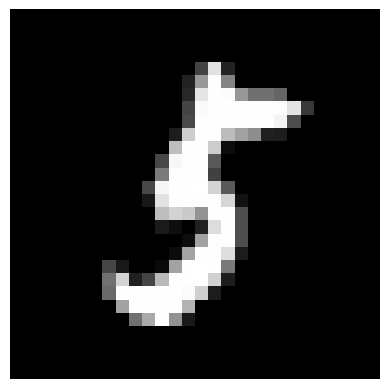

In [ ]:
a, b = X_dev.shape

test_prediction(np.random.randint(1, b), W1, b1, W2, b2)